<a href="https://colab.research.google.com/github/shankarbalaji124/Day13_ML_codegnan/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Import the dataset

data = pd.read_csv("/content/Position_Salaries.csv")

In [ ]:
#Get X and Y variables

x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [ ]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
#Reshape the y column

y = y.reshape(len(y), 1)

In [ ]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [ ]:
#Feature SCaling

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler() 

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [ ]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
#training the dataset using SVR model

from sklearn.svm import SVR

regressor = SVR(kernel = 'linear')

regressor.fit(x , y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Predict a new a result

sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([216903.83371158])

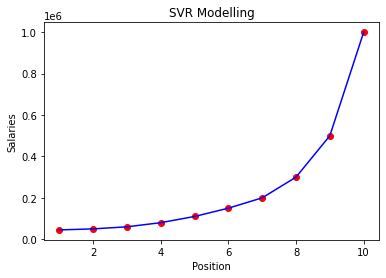

In [ ]:
#Visualize SVR results

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'blue')
plt.title("SVR Modelling")
plt.xlabel("Position")
plt.ylabel("Salaries")
plt.show()

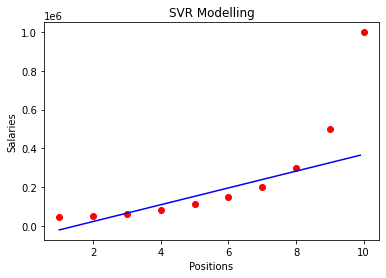

In [ ]:
#Use Grids to get some smooth curve of the data

x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title("SVR Modelling")
plt.xlabel("Positions")
plt.ylabel("Salaries")

plt.show()